In [2]:
import numpy as np
from scipy.spatial.distance import euclidean, pdist, squareform
from scipy.cluster import hierarchy
import pandas as pd
import io
import matplotlib.pyplot as plt

In [3]:
def convertToLaTeX(df, alignment="c"):
    """
    Convert a pandas dataframe to a LaTeX tabular.
    Prints labels in bold, does not use math mode
    """
    numColumns = df.shape[1]
    numRows = df.shape[0]
    output = io.StringIO()
    colFormat = ("%s|%s" % (alignment, alignment * numColumns))
    #Write header
    output.write("\\begin{tabular}{%s}\n" % colFormat)
    columnLabels = ["\\textbf{%s}" % label for label in df.columns]
    output.write("& %s\\\\\\hline\n" % " & ".join(columnLabels))
    #Write data lines
    for i in range(numRows):
        output.write("\\textbf{%s} & %s\\\\\n"
                     % (df.index[i], " & ".join([str(val) for val in df.ix[i]])))
    #Write footer
    output.write("\\end{tabular}")
    return output.getvalue()

In [4]:
Z = np.array([3.28,12.59,8.4,1.31])
H = np.array([2.78,5.89,10.1,1.52])
T = np.array([2.23,8.29,9.5,0.83])
L = np.array([1.02,5.11,2.98,1.38])
D = np.array([0.84,2.41,7.24,0.84])
C = np.array([2.45,7.85,7.85,0.71])

df = pd.DataFrame.from_dict({'Z':Z,"H":H,"T":T,"L":L,'D':D,'C':C})
df.index = ["cap","cin","win",'gas']
df


df2 = pd.DataFrame(squareform(pdist(df.transpose(), metric='euclidean')), columns=df.columns, index=df.columns)
print(convertToLaTeX(df2.applymap(lambda x: round(x,3))))

\begin{tabular}{c|cccccc}
& \textbf{Z} & \textbf{H} & \textbf{T} & \textbf{L} & \textbf{D} & \textbf{C}\\\hline
\textbf{Z} & 0.0 & 6.934 & 4.586 & 9.51 & 10.543 & 4.88\\
\textbf{H} & 6.934 & 0.0 & 2.627 & 7.377 & 4.951 & 3.11\\
\textbf{T} & 4.586 & 2.627 & 0.0 & 7.375 & 6.451 & 1.726\\
\textbf{L} & 9.51 & 7.377 & 7.375 & 0.0 & 5.076 & 5.807\\
\textbf{D} & 10.543 & 4.951 & 6.451 & 5.076 & 0.0 & 5.707\\
\textbf{C} & 4.88 & 3.11 & 1.726 & 5.807 & 5.707 & 0.0\\
\end{tabular}


c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


<Figure size 432x288 with 0 Axes>

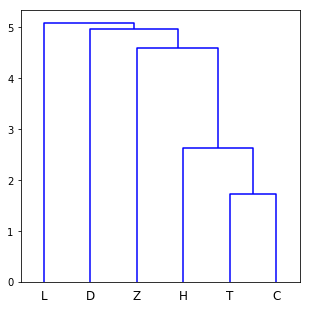

In [5]:
ytdist = np.array([1.726, 2.627, 4.586, 4.951, 5.076, 9, 10, 11, 12, 13, 14, 12, 13, 14, 15])
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
hierarchy.set_link_color_palette(['b'])
fig, axes = plt.subplots(figsize=(5, 5))
dn = hierarchy.dendrogram(Z, labels=['T','C','H','Z','D','L'])
plt.savefig("Q1_5.pdf")
